# Static data

The `foxes` package comes with a set of data files whose main purpose is to serve for examples and tests. They are also a demonstration of the file formats that are required for input data. Such provided data files are often referred to as _static data_ in foxes terminology.

Three different types of data are provided: Wind farm layout data, ambient states data, and power and thrust curve data.

In [1]:
import matplotlib.pyplot as plt

import foxes
import foxes.variables as FV

In [2]:
engine = foxes.Engine.new("default", verbosity=0)
engine.initialize()

## Wind farm layout data

### test_farm_67.csv

This is a wind farm with 67 turbines with randomly generated turbine coordinates. The file starts as follows:

```
index,label,x,y
0,T0,101872.70,1004753.57
1,T1,103659.97,1002993.29
2,T2,100780.09,1000779.97
3,T3,100290.42,1004330.88
4,T4,103005.58,1003540.36
5,T5,100102.92,1004849.55
6,T6,104162.21,1001061.70
...
```

The random layout looks like this:

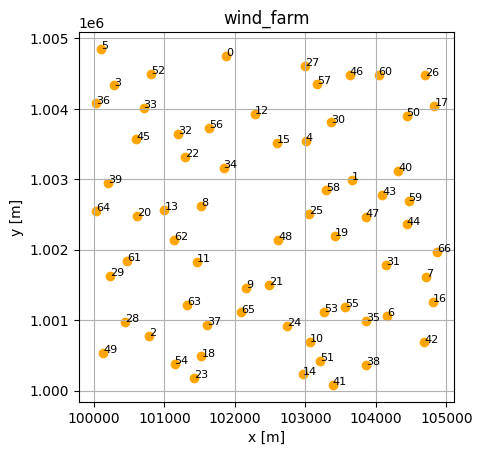

In [3]:
farm = foxes.WindFarm()
foxes.input.farm_layout.add_from_file(
    farm, "test_farm_67.csv", turbine_models=[], verbosity=0
)
foxes.output.FarmLayoutOutput(farm).get_figure()
plt.show()

## Ambient states data

### WRF-Timeseries-4464.csv.gz

This data represents a timeseries with 4464 entries as obtained by the mesoscale simulation software [WRF](https://www.mmm.ucar.edu/models/wrf) at a single horizontal point with 8 different heights:

```
Time,WS-50,WS-75,...,WS-500,WD-50,WD-75,...,WD-500,TKE-50,TKE-75,...,TKE-500,RHO
2009-01-01 00:00:00,7.37214,7.42685,...,1.28838
...
2009-01-31 23:50:00,10.27767,10.36368,...,1.30095
```

At 100 m height the wind distribution looks like this:

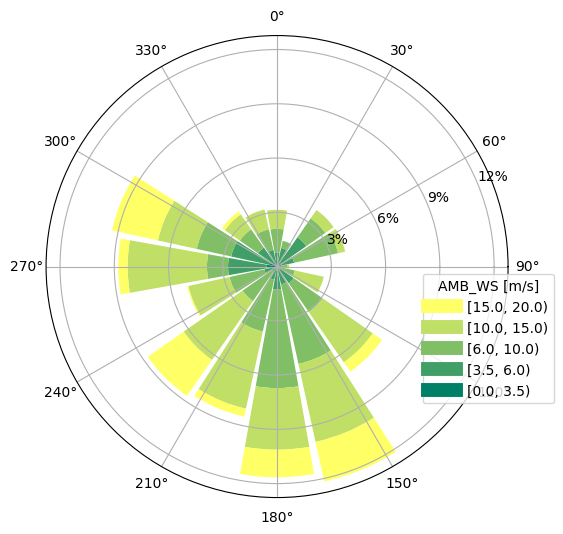

In [4]:
states = foxes.input.states.MultiHeightTimeseries(
    data_source="WRF-Timeseries-4464.csv.gz",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    heights=[50, 75, 90, 100, 150, 200, 250, 500],
    fixed_vars={FV.TI: 0.05},
)

o = foxes.output.StatesRosePlotOutput(states, point=[0.0, 0.0, 100.0])
o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

### abl_states_6000.csv.gz

This file describes binnded atmospheric boundary layer data, including Monin-Obukhov length in the column `mol`:

```
state,ws,wd,ti,mol,weight
0,8.64,253.6,0.032,0.0,8.542331196166035e-05
1,10.65,207.8,0.145,0.0,0.0001230528308906
2,6.49,46.7,0.116,0.0,0.0001563449299843
3,15.72,314.4,0.048,0.0,6.618827331554488e-05
4,11.18,302.8,0.027,694.5,5.98695302482496e-05
...
```

The distribution is well populated for all wind directions:

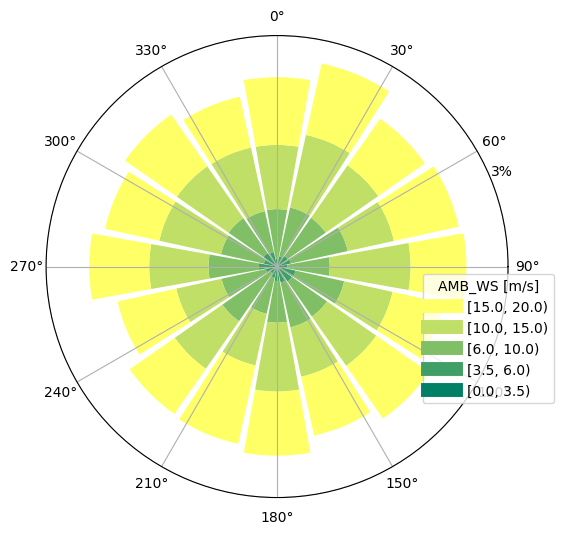

In [5]:
states = foxes.input.states.StatesTable(
    data_source="abl_states_6000.csv.gz",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO, FV.MOL],
    var2col={FV.WS: "ws", FV.WD: "wd", FV.TI: "ti", FV.MOL: "mol"},
    fixed_vars={FV.RHO: 1.225, FV.Z0: 0.05, FV.H: 100.0},
    profiles={FV.WS: "ABLLogWsProfile"},
)

o = foxes.output.StatesRosePlotOutput(states, point=[0.0, 0.0, 100.0])
o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

### timeseries_3000.csv.gz

This is a timeseries with 3000 entries:

```
Time,WS,WD,TI,RHO
2018-09-30 15:00:00,24.29,172.9,0.05,1.27
2018-09-30 16:00:00,22.51,184.13,0.05,1.21
2018-09-30 17:00:00,10.52,198.5,0.04,1.24
2018-09-30 18:00:00,34.36,209.93,0.04,1.27
2018-09-30 19:00:00,31.78,217.35,0.04,1.23
2018-09-30 20:00:00,29.15,223.8,0.04,1.26
2018-09-30 21:00:00,25.68,227.6,0.02,1.24
...
```

The distribution is as follows:

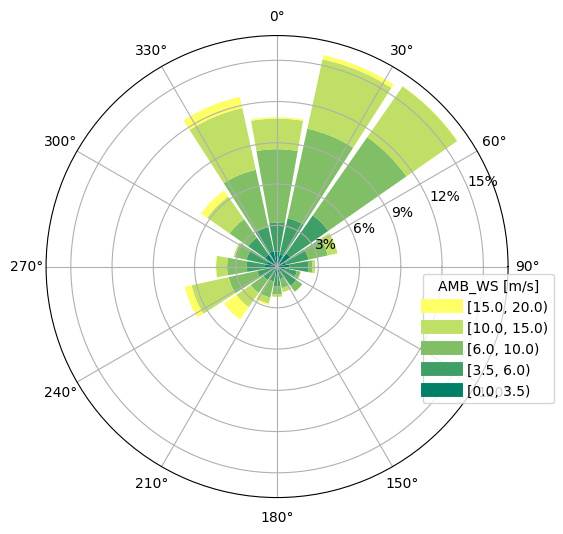

In [6]:
states = foxes.input.states.Timeseries(
    data_source="timeseries_3000.csv.gz",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
)

o = foxes.output.StatesRosePlotOutput(states, point=[0.0, 0.0, 100.0])
o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

### timeseries_8000.csv.gz

This is a timeseries with 8000 entries:

```
Time,ws,wd,ti
2017-01-01 00:00:00,15.62,244.06,0.0504
2017-01-01 00:30:00,15.99,243.03,0.0514
2017-01-01 01:00:00,16.31,243.01,0.0522
2017-01-01 01:30:00,16.33,241.26,0.0523
2017-01-01 02:00:00,16.16,241.62,0.0518
2017-01-01 02:30:00,15.95,242.21,0.0513
...
```

The distribution is as follows:

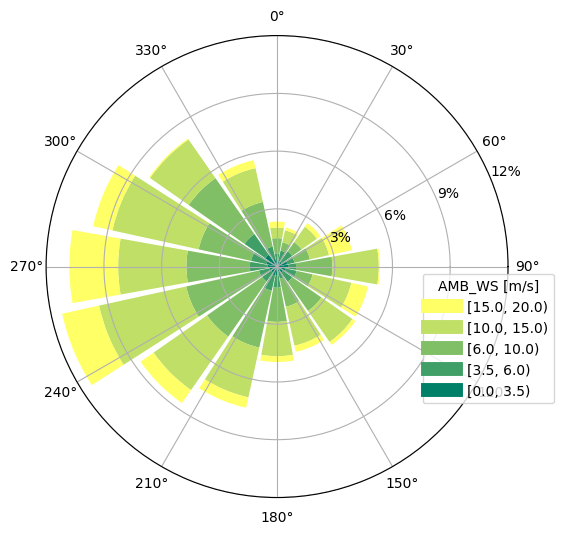

In [7]:
states = foxes.input.states.Timeseries(
    data_source="timeseries_8000.csv.gz",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "ws", FV.WD: "wd", FV.TI: "ti"},
    fixed_vars={FV.RHO: 1.225},
)

o = foxes.output.StatesRosePlotOutput(states, point=[0.0, 0.0, 100.0])
o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

### timeseries_100.csv.gz

A short timeseries with 100 entries and one minute time step, varying only wind direction:
```
Time,wd,ws
2023-07-07 12:00:00,270.0,6.0
2023-07-07 12:01:00,270.0,6.0
...
2023-07-07 12:20:00,270.0,6.0
2023-07-07 12:21:00,269.836,6.0
2023-07-07 12:22:00,269.344,6.0
2023-07-07 12:23:00,268.532,6.0
2023-07-07 12:24:00,267.406,6.0
2023-07-07 12:25:00,265.981,6.0
...
2023-07-07 13:39:00,270.0,6.0
```

The distribution is as follows:

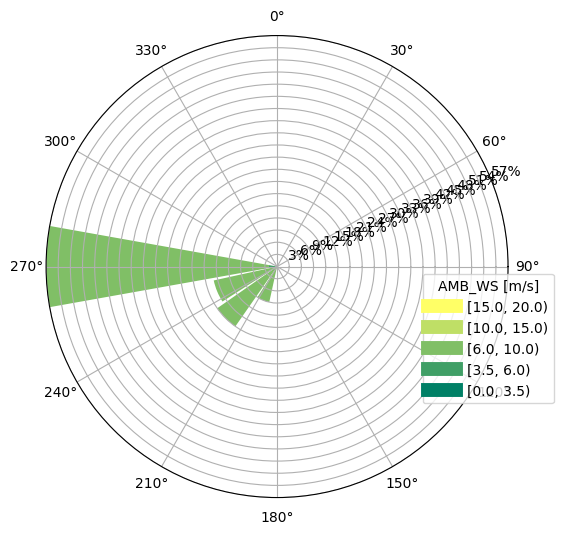

In [8]:
states = foxes.input.states.Timeseries(
    data_source="timeseries_100.csv.gz",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "ws", FV.WD: "wd"},
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

o = foxes.output.StatesRosePlotOutput(states, point=[0.0, 0.0, 100.0])
o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

### wind_rose_bremen.csv

This data file represents a (coarse) wind rose with 216 states, representing a site near Bremen, Germany. Each of the states consists of the wind direction and wind speed bin centres, and the respective statistical weight of the bin (normalized such that 1 represents 100%):

```
state,wd,ws,weight
0,0.0,3.5,0.00158
1,0.0,6.0,0.00244
2,0.0,8.5,0.00319
3,0.0,12.5,0.00367
4,0.0,17.5,0.00042
...
```

The distribution looks as follows:

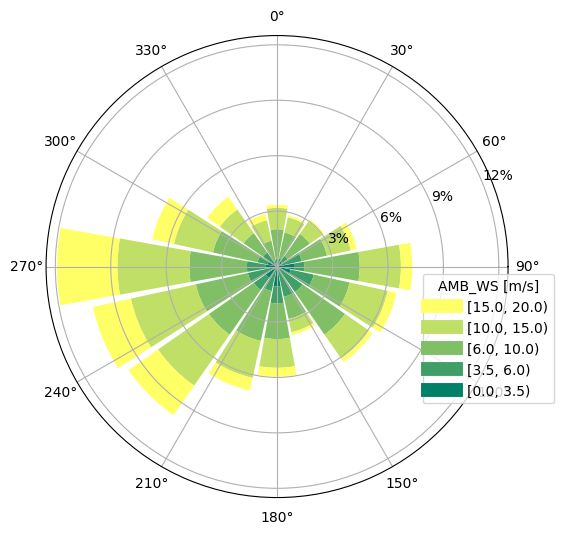

In [9]:
states = foxes.input.states.StatesTable(
    data_source="wind_rose_bremen.csv",
    output_vars=[FV.WS, FV.WD, FV.TI, FV.RHO],
    var2col={FV.WS: "ws", FV.WD: "wd", FV.WEIGHT: "weight"},
    fixed_vars={FV.RHO: 1.225, FV.TI: 0.05},
)

o = foxes.output.StatesRosePlotOutput(states, point=[0.0, 0.0, 100.0])
o.get_figure(16, FV.AMB_WS, [0, 3.5, 6, 10, 15, 20], figsize=(6, 6))
plt.show()

### wind_rotation.nc

This is a very small example for inhomogeneous wind data, with 2 states, 4 points and 2 heights:

```
dimensions:
        state = 2 ;
        h = 2 ;
        y = 2 ;
        x = 2 ;
variables:
        int state(state) ;
        float h(h) ;
                h:units = "m" ;
                h:long_name = "Height" ;
        float y(y) ;
                y:units = "m" ;
        float x(x) ;
                x:units = "m" ;
        float ws(state, h, y, x) ;
                ws:units = "m/s" ;
                ws:long_name = "Wind speed" ;
        float wd(state, h, y, x) ;
                wd:units = "deg" ;
                wd:long_name = "Wind direction" ;

// global attributes:
                :title = "Wind Rotation example" ;
                :subtitle = "A single wind state with uniform wind speed and spatial wind direction changes" ;
                :author = "IWES" ;
                :date = "22.06.2021" ;
data:

 state = 0, 1 ;

 h = 0, 300 ;

 y = 0, 2500 ;

 x = 0, 2500 ;

 ws =
  9, 9,
  9, 9,
  9, 9,
  9, 9,
  9, 9,
  9, 9,
  9, 9,
  9, 9 ;

 wd =
  180, 270,
  220, 250,
  180, 270,
  220, 250,
  0, 120,
  30, 90,
  0, 120,
  30, 90 ;
```

## Power and thrust curves

### DTU-10MW-D178d3-H119.csv

This file represents the DTU 10 MW reference turbine:

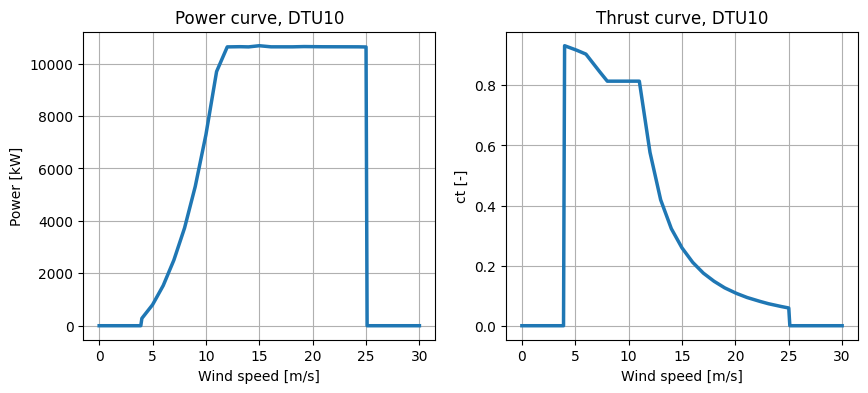

In [10]:
mbook = foxes.models.ModelBook()
mbook.turbine_types["DTU10"] = foxes.models.turbine_types.PCtFile(
    "DTU-10MW-D178d3-H119.csv"
)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
o = foxes.output.TurbineTypeCurves(mbook)
o.plot_curves("DTU10", [FV.P, FV.CT], axs=axs)
plt.show()

This turbine model is available in the default model book under the name `DTU10MW`.

### IEA-15MW-D240-H150.csv

This file represents the IEA 15 MW reference turbine:

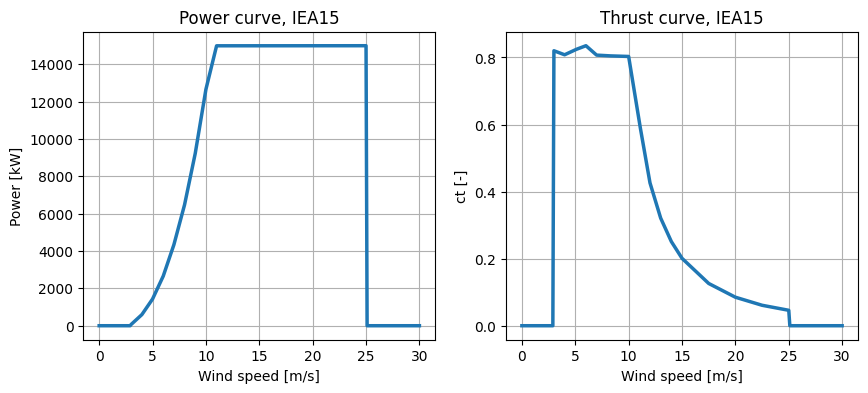

In [11]:
mbook = foxes.models.ModelBook()
mbook.turbine_types["IEA15"] = foxes.models.turbine_types.PCtFile(
    "IEA-15MW-D240-H150.csv"
)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
o = foxes.output.TurbineTypeCurves(mbook)
o.plot_curves("IEA15", [FV.P, FV.CT], axs=axs)
plt.show()

This turbine model is available in the default model book under the name `IEA15MW`.

### IWT-7d5MW-D164-H100.csv

This file represents the IWES 7.5 MW reference turbine:

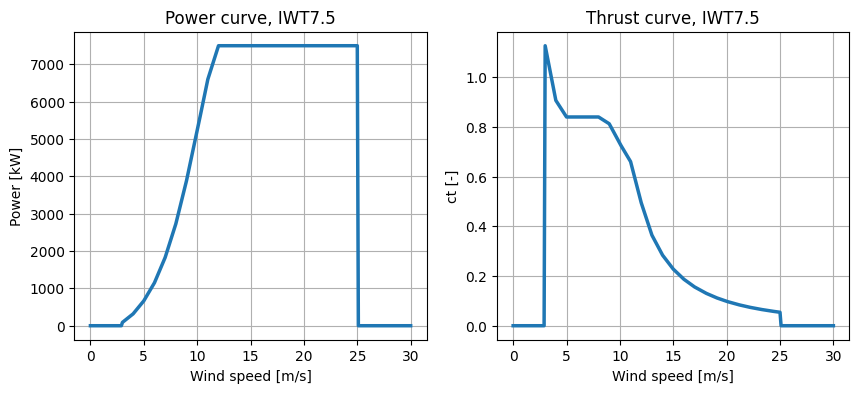

In [12]:
mbook = foxes.models.ModelBook()
mbook.turbine_types["IWT7.5"] = foxes.models.turbine_types.PCtFile(
    "IWT-7d5MW-D164-H100.csv"
)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
o = foxes.output.TurbineTypeCurves(mbook)
o.plot_curves("IWT7.5", [FV.P, FV.CT], axs=axs)
plt.show()

This turbine model is available in the default model book under the name `IWT7.5MW`.

### NREL-5MW-D126-H90.csv

This file represents the NREL 5 MW reference turbine:

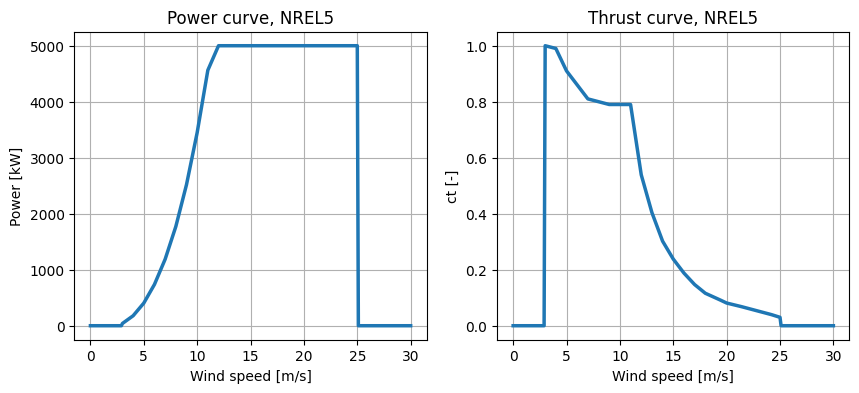

In [13]:
mbook = foxes.models.ModelBook()
mbook.turbine_types["NREL5"] = foxes.models.turbine_types.PCtFile(
    "NREL-5MW-D126-H90.csv"
)

fig, axs = plt.subplots(1, 2, figsize=(10, 4))
o = foxes.output.TurbineTypeCurves(mbook)
o.plot_curves("NREL5", [FV.P, FV.CT], axs=axs)
plt.show()

This turbine model is available in the default model book under the name `NREL5MW`.

## File paths

The available static data files can be listed by creating a `StaticData` object:

In [14]:
import foxes

In [15]:
dbook = foxes.StaticData()

print("Farm:\n", dbook.toc(foxes.FARM))
print("\nStates:\n", dbook.toc(foxes.STATES))
print("\nCurves:\n", dbook.toc(foxes.PCTCURVE))

Farm:
 ['test_farm_67.csv']

States:
 ['WRF-Timeseries-3000.nc', 'WRF-Timeseries-4464.csv.gz', 'abl_states_6000.csv.gz', 'timeseries_100.csv.gz', 'timeseries_3000.csv.gz', 'timeseries_8000.csv.gz', 'wind_rose_bremen.csv', 'wind_rotation.nc', 'winds100.tab']

Curves:
 ['DTU-10MW-D178d3-H119.csv', 'IEA-15MW-D240-H150.csv', 'IWT-7d5MW-D164-H100.csv', 'NREL-5MW-D126-H90.csv']


Note that the `toc` function requires as argument one of the three data categories. For each of the mentioned files we can then get the path in the local system:

In [16]:
path = dbook.get_file_path(foxes.FARM, "test_farm_67.csv")
print(type(path), ":", path.relative_to(path.parents[3]))

<class 'pathlib.PosixPath'> : foxes/data/farms/test_farm_67.csv


The `path` is a full `PosixPath` object here, but only parts of it are shown in the printout (feel invited to print the complete file location when running this example yourself, simply by `print(path)`).

In [17]:
engine.finalize()